In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

## **Loading Data**

In [2]:
df=pd.read_csv("placementdata.csv")
df.head()

# **EXPLORATORY DATA ANALYSIS(EDA)**

In [3]:
df.shape

(10000, 12)

In [1]:
df.info()

NameError: name 'df' is not defined

In [5]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


# **Data Cleaning**

In [7]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

**Univariate Analysis of Numerical and Categorical Data**

In [10]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Drop 'StudentID' column if it exists in numerical_columns
if 'StudentID' in numerical_columns:
	numerical_columns = numerical_columns.drop('StudentID')

**Graphs for Categorical Data**

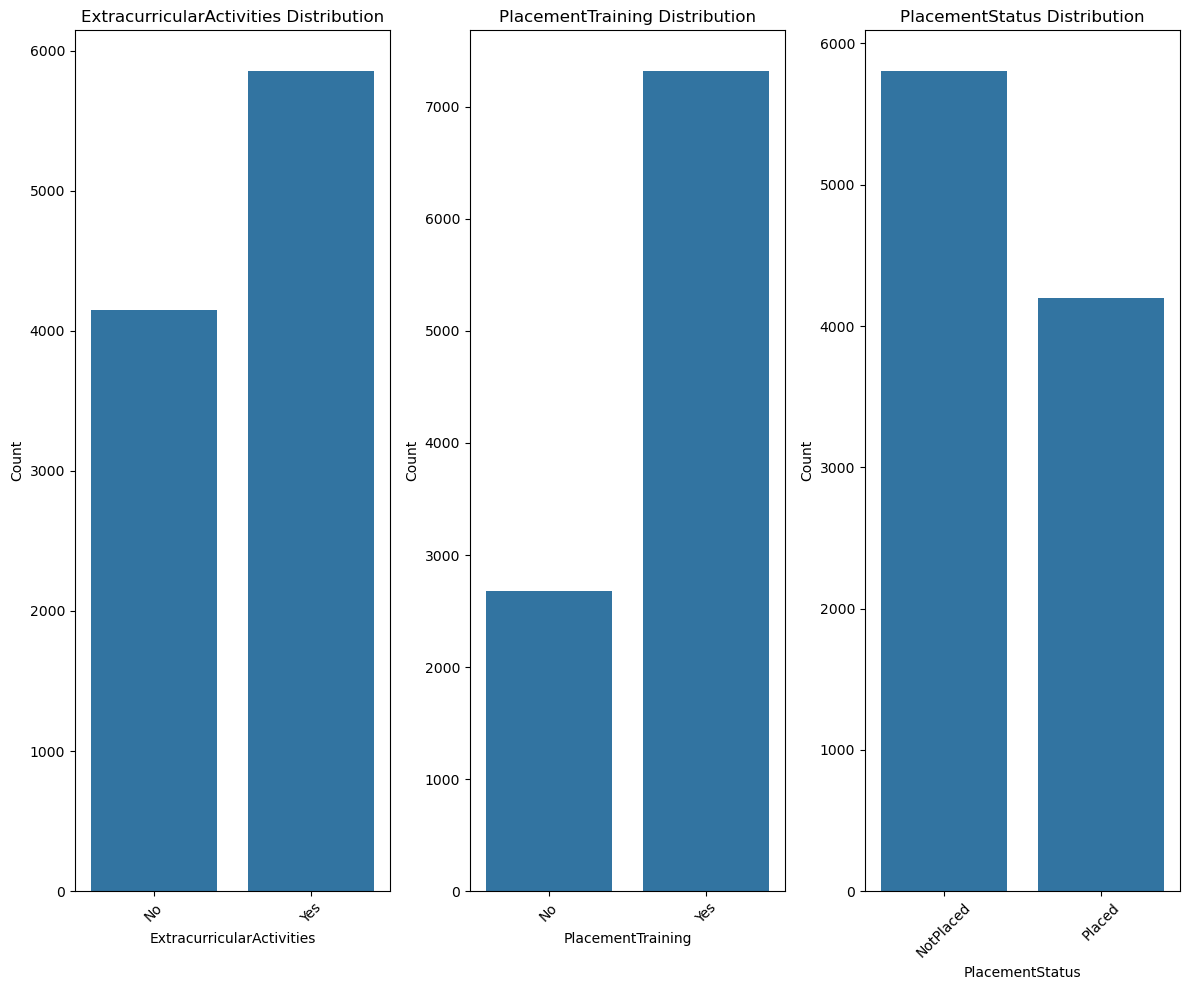

In [11]:
# Plot bar graphs for categorical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

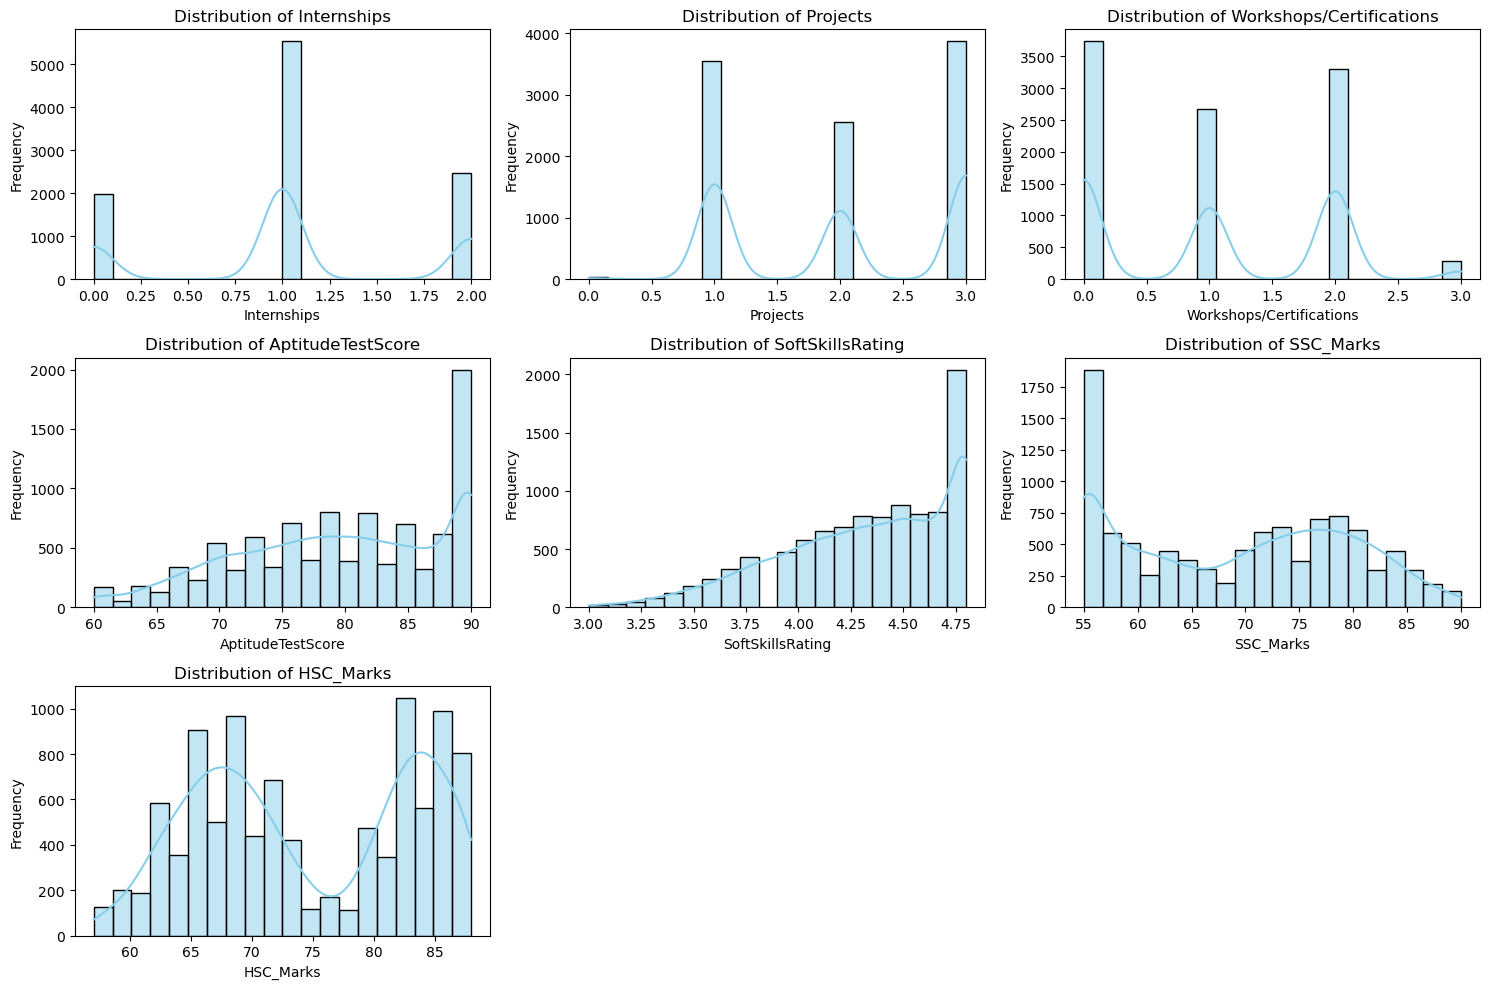

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[1:], start=1):  # Exclude StudentID
    plt.subplot((len(numerical_columns[1:]) + 2) // 3, 3, i)  # Flexible grid
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## **Bivariate Analysis**

**Numerical Data (average values grouped by PlacementStatus)**

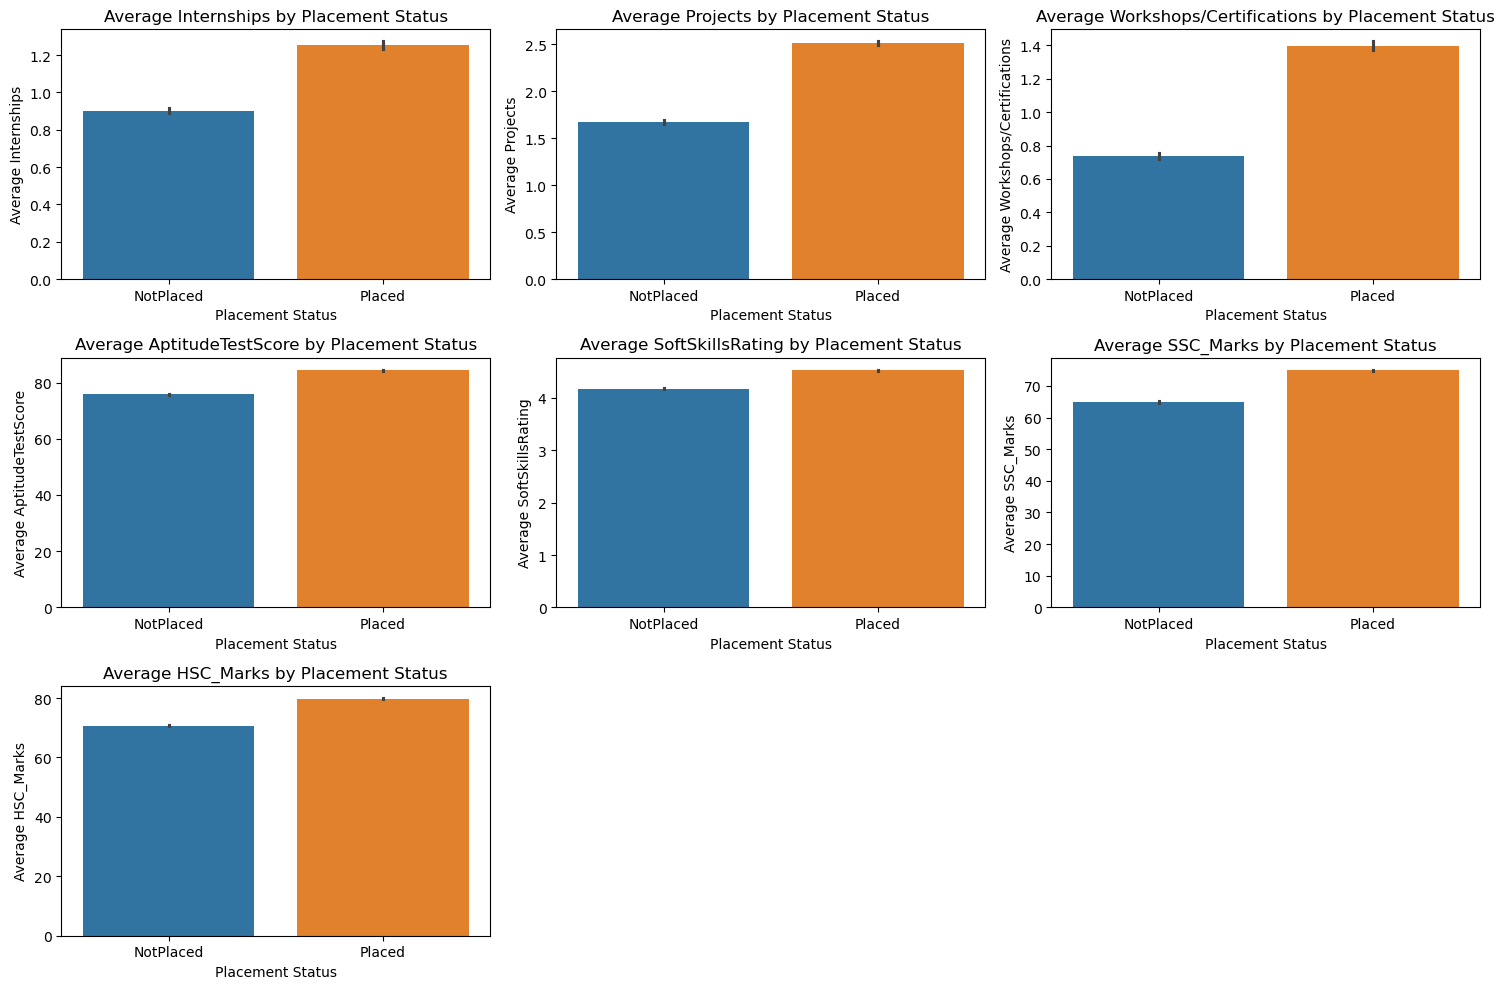

In [13]:
# Plot bar graphs for numerical columns (average values grouped by PlacementStatus)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[1:], start=1):  # Exclude StudentID
    plt.subplot((len(numerical_columns[1:]) + 2) // 3, 3, i)  # Flexible grid
    sns.barplot(x=df['PlacementStatus'], y=df[col], hue=df['PlacementStatus'],legend=False)
    plt.title(f'Average {col} by Placement Status')
    plt.xlabel('Placement Status')
    plt.ylabel(f'Average {col}')
plt.tight_layout()
plt.show()

In [14]:
# Calculate mean, median, and sum for numerical features by PlacementStatus
grouped_stats = df.groupby('PlacementStatus')[numerical_columns].agg(['mean', 'median'])
# Display the grouped statistics
grouped_stats

CGPA        Internships         Projects         \
                     mean median        mean median      mean median   
PlacementStatus                                                        
NotPlaced        7.467672    7.5    0.901775    1.0  1.675857    1.0   
Placed           8.016488    8.2    1.253038    1.0  2.511556    3.0   

                Workshops/Certifications        AptitudeTestScore         \
                                    mean median              mean median   
PlacementStatus                                                            
NotPlaced                        0.73462    1.0         75.829399   76.0   
Placed                           1.39838    2.0         84.455802   86.0   

                SoftSkillsRating         SSC_Marks         HSC_Marks         
                            mean median       mean median       mean median  
PlacementStatus                                                              
NotPlaced               4.174393    4.2  64.992590   62.0  70.665346   69.0  
Placed                  4.530760    4.6  74.920658   76.0  79.805575   83.0

## **Multivariate Analysis**

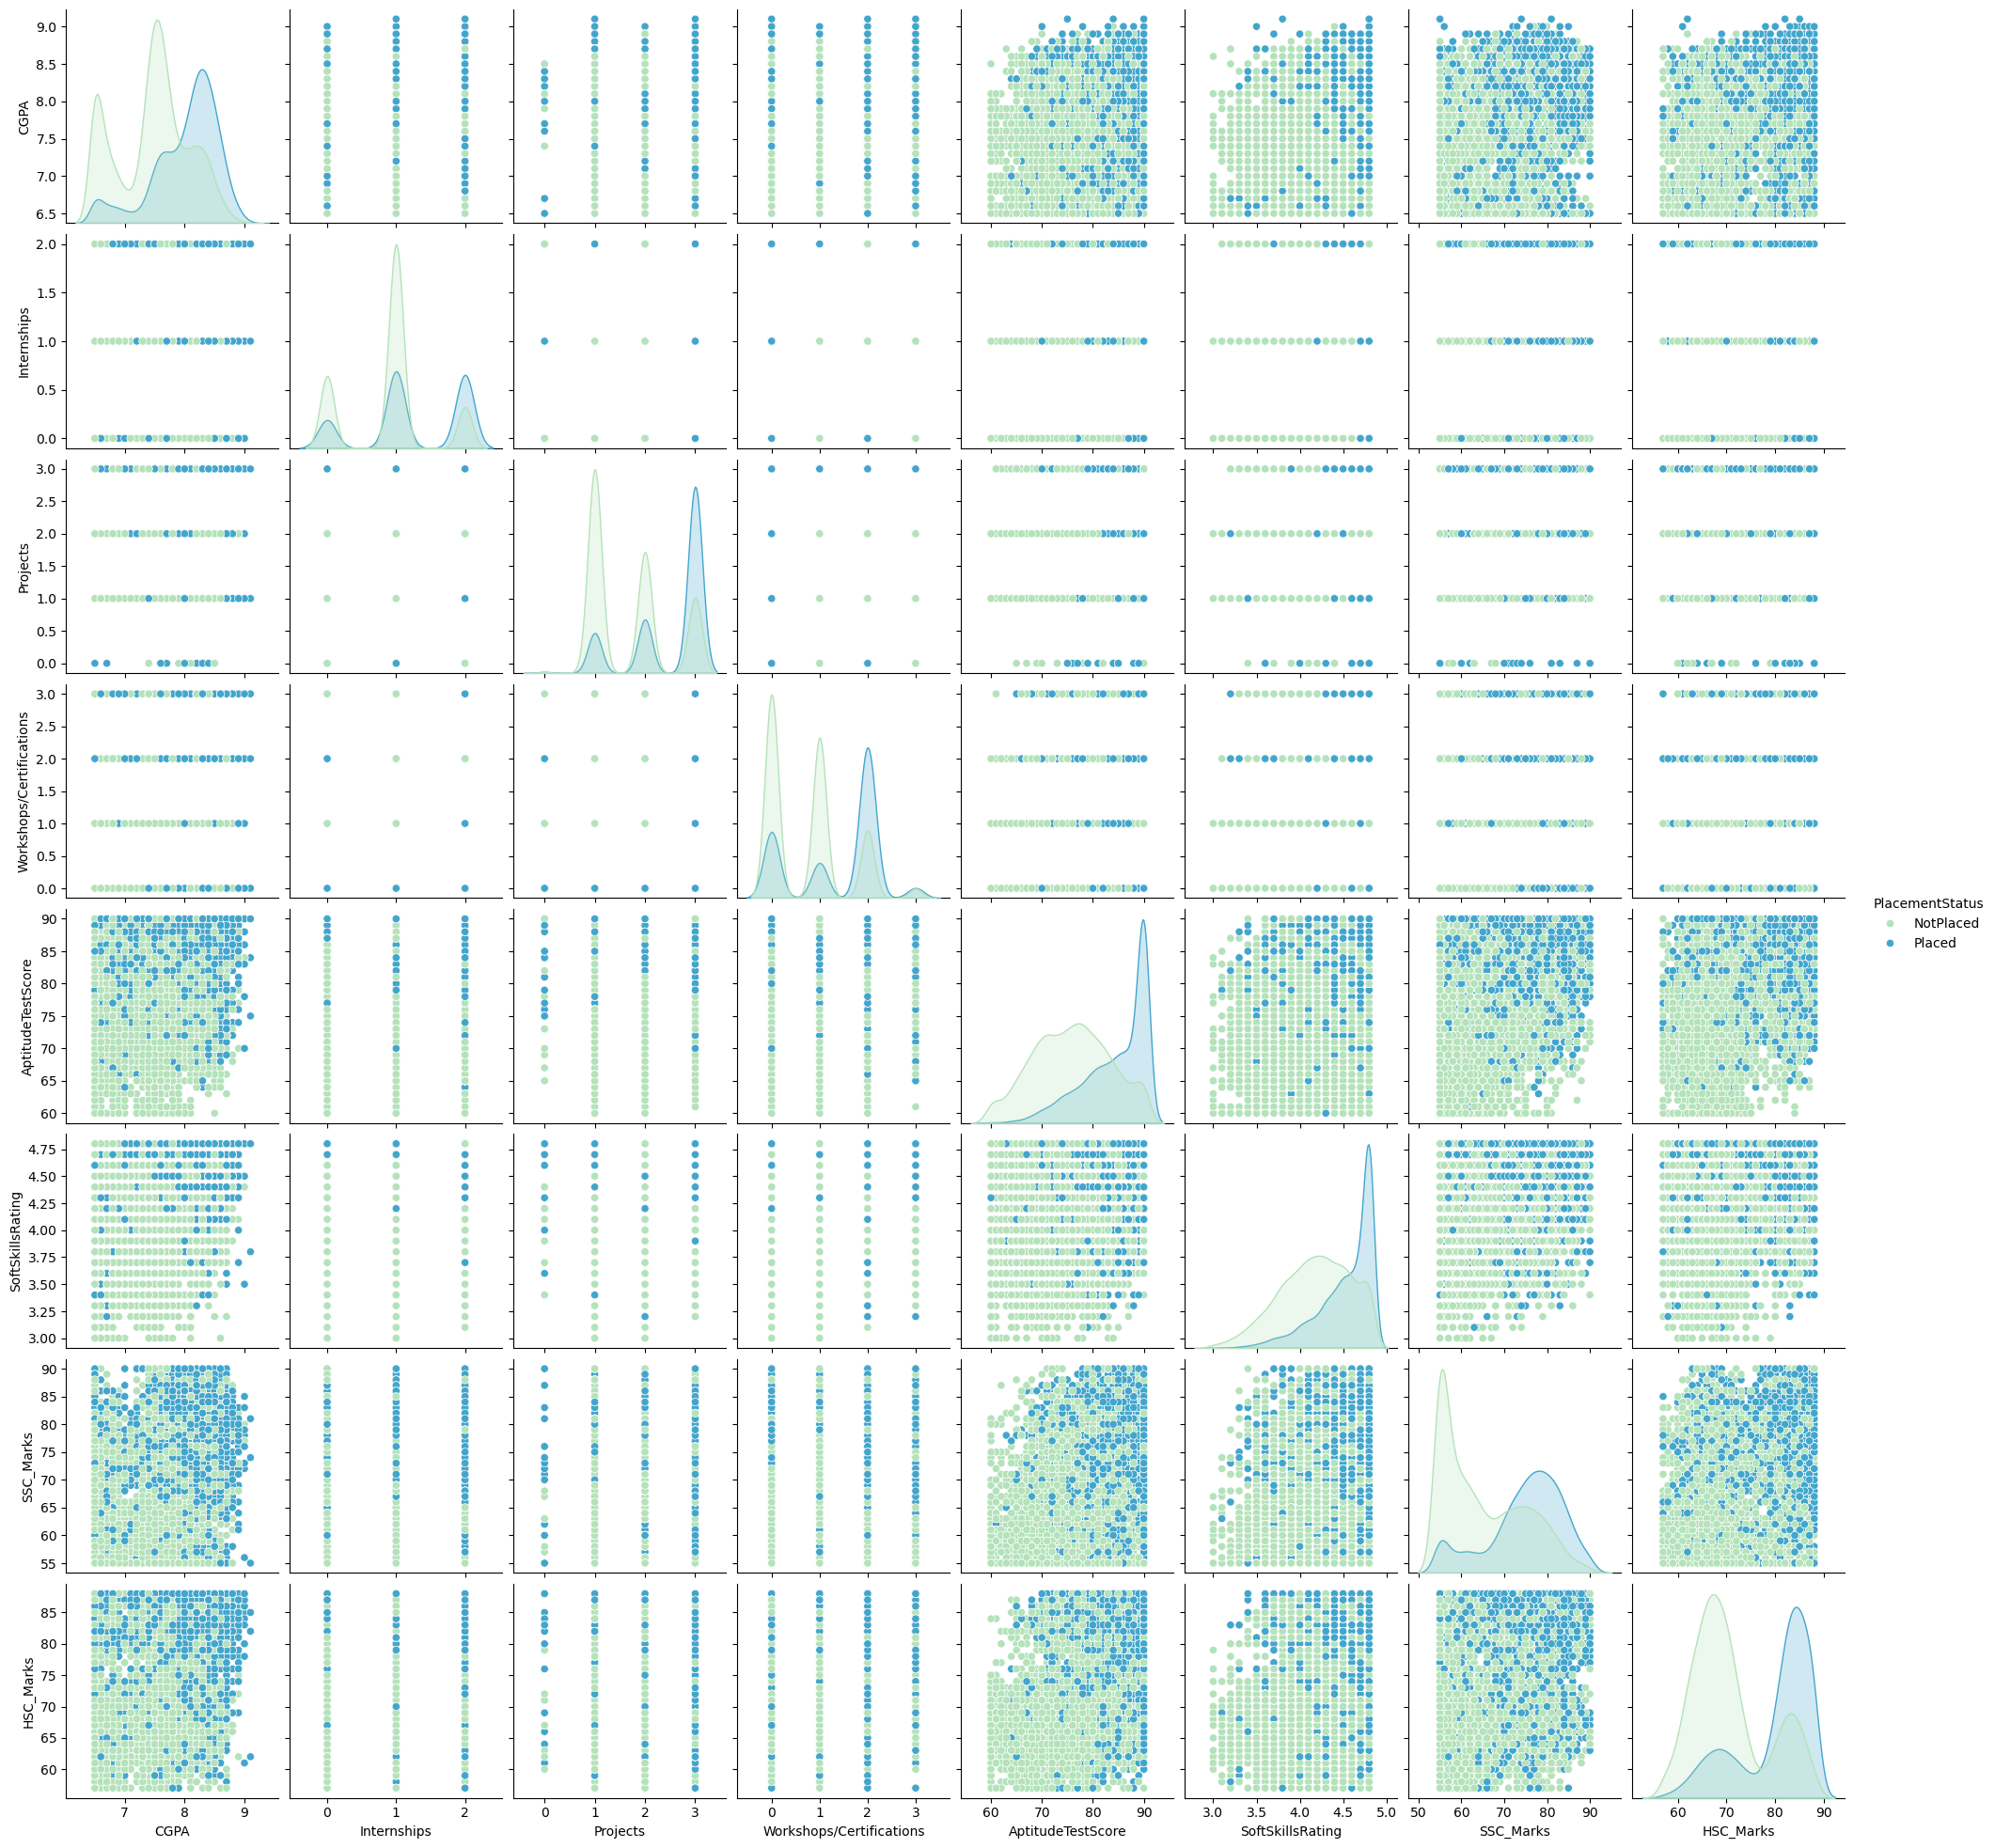

In [15]:
numerical_col = df.columns.drop('StudentID')
sns.pairplot(df[numerical_col], hue="PlacementStatus", diag_kind="kde", palette="GnBu")
plt.show()

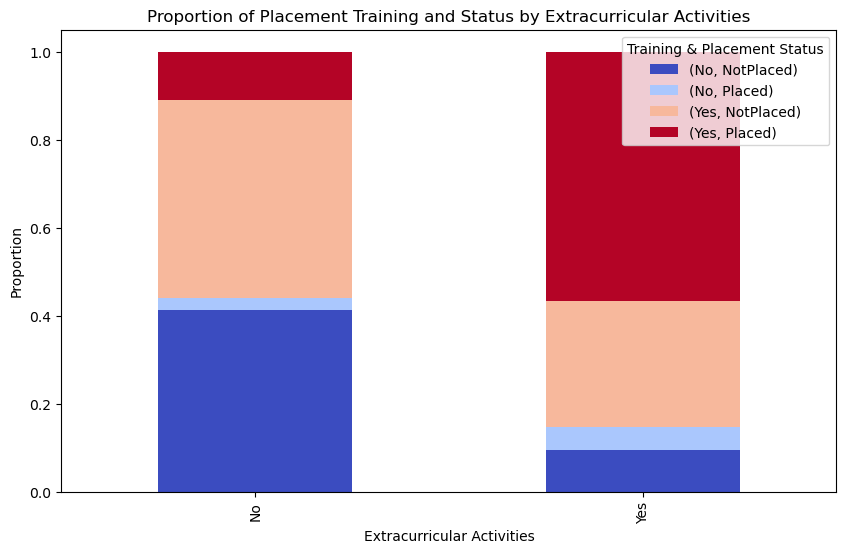

In [16]:
stacked_data = pd.crosstab(df['ExtracurricularActivities'], [df['PlacementTraining'], df['PlacementStatus']], normalize='index')

# Plotting
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Proportion of Placement Training and Status by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Proportion')
plt.legend(title='Training & Placement Status')
plt.show()


## Satatistical Analysis

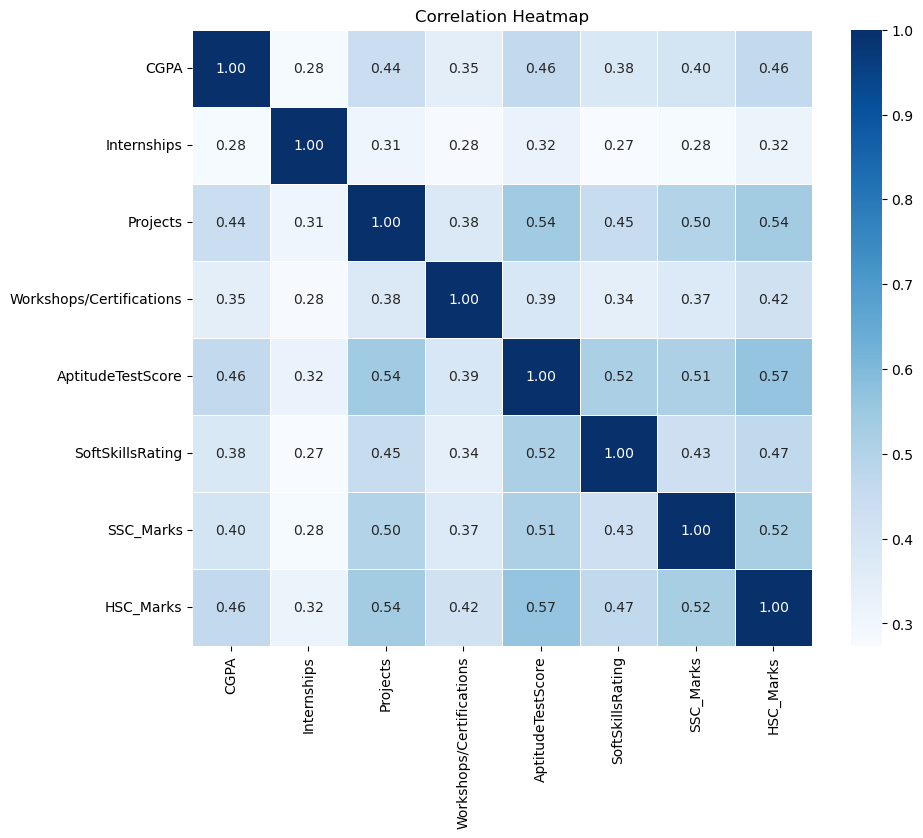

In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop('StudentID', axis=1)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:

from scipy.stats import chi2_contingency

column1 = 'PlacementTraining'  # Replace with your first column
column2 = 'PlacementStatus'  # Replace with your second column

# Create a contingency table
contingency_table = pd.crosstab(df[column1], df[column2])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
# Output the results


PlacementStatus    NotPlaced  Placed
PlacementTraining                   
No                      2264     418
Yes                     3539    3779


In [19]:

from scipy.stats import spearmanr

column1 = 'PlacementTraining'  # Replace with your first column
column2 = 'PlacementStatus'  # Replace with your second column

# Ensure the columns are binary (0/1)
assert df[column1].nunique() == 2, "Column1 is not binary!"
assert df[column2].nunique() == 2, "Column2 is not binary!"

# Calculate Spearman's Rank Correlation
spearman_corr, p_value = spearmanr(df[column1], df[column2])

print(f"Spearman's Rank Correlation: {spearman_corr}")
print(f"P-value: {p_value}")


Spearman's Rank Correlation: 0.3236593752383804
P-value: 1.4065143940220988e-242


# Machine Learning

## Data Pre-Processing

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(df[['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']])

# Create a new dataframe for encoded columns
encoded_columns = encoder.get_feature_names_out(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Combine with the original dataframe (excluding original categorical columns)
df_final = pd.concat([df.drop(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], axis=1), encoded_df], axis=1)

# Display the updated dataframe
df_final.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_Yes,PlacementTraining_Yes,PlacementStatus_Placed
0,1,7.5,1,1,1,65,4.4,61,79,0.0,0.0,0.0
1,2,8.9,0,3,2,90,4.0,78,82,1.0,1.0,1.0
2,3,7.3,1,2,2,82,4.8,79,80,1.0,0.0,0.0
3,4,7.5,1,1,2,85,4.4,81,80,1.0,1.0,1.0
4,5,8.3,1,2,2,86,4.5,74,88,1.0,1.0,1.0


Features scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df_final.drop('PlacementStatus_Placed', axis=1)
y = df_final['PlacementStatus_Placed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'saga'}
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1172
         1.0       0.74      0.77      0.75       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Logistic Regression Confusion Matrix:


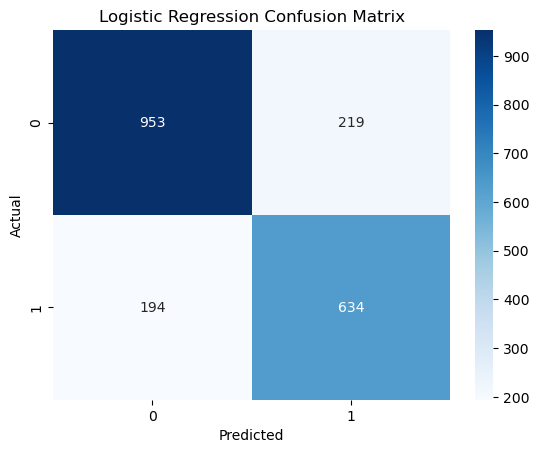

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76      1172
         1.0       0.66      0.66      0.66       828

    accuracy                           0.72      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.72      0.72      0.72      2000

Decision Tree Confusion Matrix:


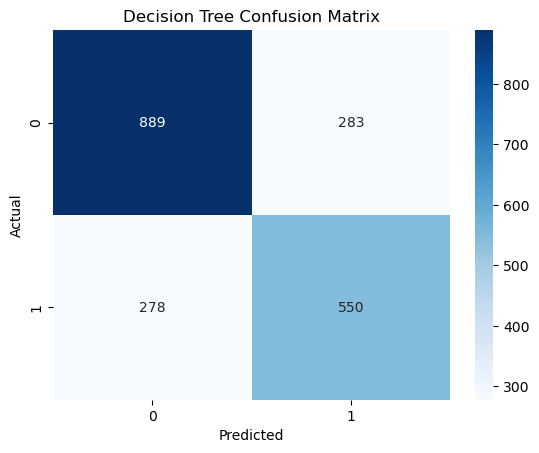

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      1172
         1.0       0.76      0.72      0.74       828

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000

Random Forest Confusion Matrix:


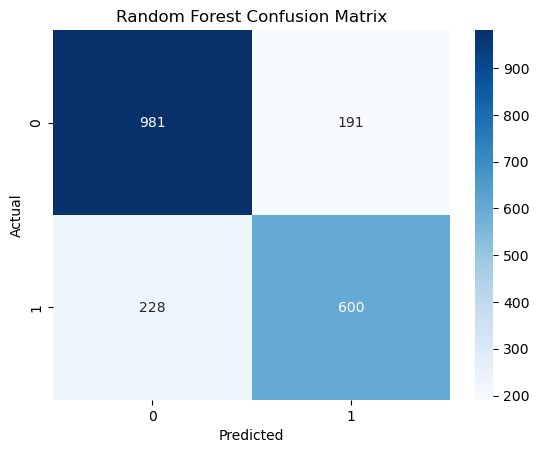

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
print(f"Best Logistic Regression Parameters: {log_reg_grid.best_params_}")

# Hyperparameter tuning for Decision Tree
decision_tree_params = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='accuracy')
decision_tree_grid.fit(X_train, y_train)
best_decision_tree = decision_tree_grid.best_estimator_
print(f"Best Decision Tree Parameters: {decision_tree_grid.best_params_}")

# Hyperparameter tuning for Random Forest
random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=5, scoring='accuracy')
random_forest_grid.fit(X_train, y_train)
best_random_forest = random_forest_grid.best_estimator_
print(f"Best Random Forest Parameters: {random_forest_grid.best_params_}")
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Classification Report and Confusion Matrix for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report and Confusion Matrix for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("Decision Tree Confusion Matrix:")
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report and Confusion Matrix for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))
print("Random Forest Confusion Matrix:")
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Saving the models

In [30]:
# Save the models
joblib.dump(best_log_reg, 'logistic_regression_model.pkl')
joblib.dump(best_decision_tree, 'decision_tree_model.pkl')
joblib.dump(best_random_forest, 'random_forest_model.pkl')

print("Models have been saved successfully.")

Models have been saved successfully.


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
from scipy.stats import chi2_contingency, spearmanr

import matplotlib.pyplot as plt

# Load data
st.title("Placement Data Analysis and Prediction")
st.markdown("## Loading Data")
df = pd.read_csv("placementdata.csv")
st.write(df.head())

# Exploratory Data Analysis (EDA)
st.markdown("## Exploratory Data Analysis (EDA)")
st.write("Shape of the dataset:", df.shape)
st.write("Info of the dataset:")
st.write(df.info())
st.write("Columns in the dataset:", df.columns)
st.write("Description of the dataset:")
st.write(df.describe())

# Data Cleaning
st.markdown("## Data Cleaning")
st.write("Missing values in the dataset:")
st.write(df.isnull().sum())
st.write("Duplicate rows in the dataset:", df.duplicated().sum())
st.write("Unique values in 'PlacementStatus':", df['PlacementStatus'].unique())

# Univariate Analysis
st.markdown("## Univariate Analysis")
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

if 'StudentID' in numerical_columns:
    numerical_columns = numerical_columns.drop('StudentID')

st.markdown("### Categorical Data")
fig, axes = plt.subplots((len(categorical_columns) + 2) // 3, 3, figsize=(12, 10))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{col} Distribution')
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel('Count')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)
plt.tight_layout()
st.pyplot(fig)

st.markdown("### Numerical Data")
fig, axes = plt.subplots((len(numerical_columns[1:]) + 2) // 3, 3, figsize=(15, 10))
for i, col in enumerate(numerical_columns[1:]):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {col}')
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel('Frequency')
plt.tight_layout()
st.pyplot(fig)

# Bivariate Analysis
st.markdown("## Bivariate Analysis")
st.markdown("### Numerical Data (average values grouped by PlacementStatus)")
fig, axes = plt.subplots((len(numerical_columns[1:]) + 2) // 3, 3, figsize=(15, 10))
for i, col in enumerate(numerical_columns[1:]):
    sns.barplot(x='PlacementStatus', y=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Average {col} by Placement Status')
    axes[i // 3, i % 3].set_xlabel('Placement Status')
    axes[i // 3, i % 3].set_ylabel(f'Average {col}')
plt.tight_layout()
st.pyplot(fig)

grouped_stats = df.groupby('PlacementStatus')[numerical_columns].agg(['mean', 'median'])
st.write("Grouped statistics by PlacementStatus:")
st.write(grouped_stats)

# Multivariate Analysis
st.markdown("## Multivariate Analysis")
numerical_col = df.columns.drop('StudentID')
fig = sns.pairplot(df[numerical_col], hue="PlacementStatus", diag_kind="kde", palette="GnBu")
st.pyplot(fig)

stacked_data = pd.crosstab(df['ExtracurricularActivities'], [df['PlacementTraining'], df['PlacementStatus']], normalize='index')
fig = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Proportion of Placement Training and Status by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Proportion')
plt.legend(title='Training & Placement Status')
st.pyplot(fig)

# Statistical Analysis
st.markdown("## Statistical Analysis")
fig = plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop('StudentID', axis=1)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
st.pyplot(fig)


column1 = 'PlacementTraining'
column2 = 'PlacementStatus'
contingency_table = pd.crosstab(df[column1], df[column2])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
st.write("Chi-square test results:")
st.write("Chi2:", chi2)
st.write("P-value:", p_value)
st.write("Degrees of freedom:", dof)
st.write("Expected frequencies:", expected)

spearman_corr, p_value = spearmanr(df[column1], df[column2])
st.write("Spearman's Rank Correlation:")
st.write("Spearman's Rank Correlation:", spearman_corr)
st.write("P-value:", p_value)

# Machine Learning
st.markdown("## Machine Learning")
st.markdown("### Data Pre-Processing")
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']])
encoded_columns = encoder.get_feature_names_out(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
df_final = pd.concat([df.drop(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], axis=1), encoded_df], axis=1)
st.write("Encoded DataFrame:")
st.write(df_final.head())

X = df_final.drop('PlacementStatus_Placed', axis=1)
y = df_final['PlacementStatus_Placed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning and model training
st.markdown("### Hyperparameter Tuning and Model Training")
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
st.write("Best Logistic Regression Parameters:", log_reg_grid.best_params_)

decision_tree_params = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='accuracy')
decision_tree_grid.fit(X_train, y_train)
best_decision_tree = decision_tree_grid.best_estimator_
st.write("Best Decision Tree Parameters:", decision_tree_grid.best_params_)

random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=5, scoring='accuracy')
random_forest_grid.fit(X_train, y_train)
best_random_forest = random_forest_grid.best_estimator_
st.write("Best Random Forest Parameters:", random_forest_grid.best_params_)

# Model Evaluation
st.markdown("### Model Evaluation")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

st.write("Logistic Regression Classification Report:")
st.text(classification_report(y_test, y_pred_log_reg))
st.write("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
fig = plt.figure()
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

st.write("Decision Tree Classification Report:")
st.text(classification_report(y_test, y_pred_decision_tree))
st.write("Decision Tree Confusion Matrix:")
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
fig = plt.figure()
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

st.write("Random Forest Classification Report:")
st.text(classification_report(y_test, y_pred_random_forest))
st.write("Random Forest Confusion Matrix:")
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
fig = plt.figure()
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

# Save the models
st.markdown("### Saving the Models")
joblib.dump(best_log_reg, 'logistic_regression_model.pkl')
joblib.dump(best_decision_tree, 'decision_tree_model.pkl')
joblib.dump(best_random_forest, 'random_forest_model.pkl')
st.write("Models have been saved successfully.")